#### 서울 열린 데이터 광장
    - 서울시 자치구 연도별 CCTV 설치 현황(https://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do)
    - 서울시 5대 범죄 발생 현황(https://data.seoul.go.kr/dataList/316/S/2/datasetView.do)
    - 서울시 주민등록인구(월별_구별) 통계(https://data.seoul.go.kr/dataList/11067/S/2/datasetView.do)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# warnings : 함수를 현재는 지원하나 나중에 삭제 시 경고 메세지가 발생

import warnings
warnings.simplefilter("ignore")

sns.set_theme()
sns.set(rc={"figure.figsize":(10,5)})

plt.rcParams["font.family"] ="Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

##### 1. cctv 설치현황

In [2]:
# cctv 데이터 로드

cctv_df = pd.read_csv("./data/CCTV 설치 현황_221231.csv", encoding="cp949", thousands=",", skiprows=[1])
cctv_df.head(3)


,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,종로구,1980,36,540,107,161,131,158,152,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,중 구,2584,130,87,77,236,240,372,386,155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,용산구,2847,44,50,68,83,295,491,115,322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cctv_df.columns

Index(['구분', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년',
       ...
       'Unnamed: 16374', 'Unnamed: 16375', 'Unnamed: 16376', 'Unnamed: 16377',
       'Unnamed: 16378', 'Unnamed: 16379', 'Unnamed: 16380', 'Unnamed: 16381',
       'Unnamed: 16382', 'Unnamed: 16383'],
      dtype='object', length=16384)

In [4]:
# 데이터 전처리
# 필요한 컬럼만 복사해서 데이터프레임 생성

cctv_df = cctv_df[['구분', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년']]

In [5]:
cctv_df.head()

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291
1,중 구,2584,130,87,77,236,240,372,386,155,361,403,137
2,용산구,2847,44,50,68,83,295,491,115,322,623,422,334
3,성동구,4047,58,99,110,366,279,945,459,647,485,367,232
4,광진구,3480,507,82,84,64,21,465,443,709,172,662,271


In [6]:
# 컬럼명 변경
# 구분 => 구 별, 총계 => cctv 총계, 2013년 이전\n설치된 CCTV => 2013년 이전

cctv_df.rename(columns={"구분":"구 별","총계":"cctv 총계","2013년 이전\n설치된 CCTV":"2013년 이전"},inplace=True)

In [7]:
# 2020년 이전 컬럼 생성 = 2013년 이전 + ~~~ + 2020년

cctv_df["2020년 이전"] = cctv_df.iloc[:,2:11].sum(axis=1)

In [8]:
cctv_df.head(1)

,구 별,cctv 총계,2013년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2020년 이전
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,1604


In [9]:
cctv_df.drop(columns=['2020년 이전'],inplace=True)

In [10]:
# 2020년 이전 컬럼 생성 = 2013년 이전 + ~~~ + 2020년
# 방법 2 : difference()

# cctv_df.columns.difference(['구 별', 'cctv 총계', '2021년', '2022년'])

cctv_df["2020년 이전"] = cctv_df[cctv_df.columns.difference(['구 별', 'cctv 총계', '2021년', '2022년'])].sum(axis=1)

In [11]:
cctv_df.head(1)

,구 별,cctv 총계,2013년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2020년 이전
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,1604


In [12]:
cctv_df.drop(columns=['2013년 이전', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년'],inplace=True)

In [13]:
cctv_df.head(3)

,구 별,cctv 총계,2020년,2021년,2022년,2020년 이전
0,종로구,1980,250,85,291,1604
1,중 구,2584,361,403,137,2044
2,용산구,2847,623,422,334,2091


In [14]:
# 중 구 ==> 중구
cctv_df.iloc[1,0] = "중구"

In [15]:
# 데이터 분석
# 1. 구별 cctv가 가장 적게 설치되어 있는 구 알아보기

cctv_df[min(cctv_df['cctv 총계']) == cctv_df['cctv 총계']]

,구 별,cctv 총계,2020년,2021년,2022년,2020년 이전
0,종로구,1980,250,85,291,1604


In [16]:
# 2. 구별 cctv가 가장 많이 설치되어 있는 구 알아보기
cctv_df[max(cctv_df['cctv 총계']) == cctv_df['cctv 총계']]

,구 별,cctv 총계,2020년,2021년,2022년,2020년 이전
22,강남구,7243,923,514,468,6261


##### 2. 서울시 거주 인구 데이터

In [17]:
seoul_df = pd.read_excel("./data/주민등록인구(월별)_202212.xlsx",skiprows=[0,1,3],usecols='B,D,G,J')
seoul_df.head(3)

,동별(2),소계.1,소계.2,소계.3
0,종로구,152211,141379,10832
1,중구,130785,120437,10348
2,용산구,233284,218650,14634


In [18]:
# 컬럼명 변경
# 구 별, 총인구, 한국인, 외국인

seoul_df.rename(columns={'동별(2)':'구 별', '소계.1':'총인구', '소계.2':'한국인', '소계.3':'외국인'}, inplace=True)

In [19]:
seoul_df

,구 별,총인구,한국인,외국인
0,종로구,152211,141379,10832
1,중구,130785,120437,10348
2,용산구,233284,218650,14634
3,성동구,288234,281000,7234
4,광진구,351252,337416,13836
5,동대문구,353601,336644,16957
6,중랑구,390140,385318,4822
7,성북구,441984,430397,11587
8,강북구,297702,293660,4042
9,도봉구,313989,311694,2295


In [20]:
# 외국인 컬럼 기준으로 내림 차순
seoul_df.sort_values("외국인",ascending=False)

,구 별,총인구,한국인,외국인
16,구로구,418418,395315,23103
18,영등포구,398085,375675,22410
5,동대문구,353601,336644,16957
2,용산구,233284,218650,14634
20,관악구,501226,486752,14474
4,광진구,351252,337416,13836
12,서대문구,319554,306337,13217
17,금천구,242818,229642,13176
7,성북구,441984,430397,11587
13,마포구,375585,364638,10947


In [21]:
# cctv 설치 대수 대비 범죄율 파악
# cctv_df 와 seoul_df 합치기
merge_df = pd.merge(seoul_df,cctv_df,on="구 별")

In [22]:
# merge_df index 설정 : 구 별

merge_df.set_index("구 별",inplace=True)

In [23]:
merge_df.head(3)

,총인구,한국인,외국인,cctv 총계,2020년,2021년,2022년,2020년 이전
구 별,,,,,,,,
종로구,152211,141379,10832,1980,250,85,291,1604
중구,130785,120437,10348,2584,361,403,137,2044
용산구,233284,218650,14634,2847,623,422,334,2091


In [24]:
# 1인당 cctv 비율 구하기
# 1인당 cctv 비울 = cctv 총계 / 총인구 * 100
merge_df["1인당 cctv 비율"] = merge_df["cctv 총계"] / merge_df["총인구"] * 100

In [25]:
merge_df.head(3)

,총인구,한국인,외국인,cctv 총계,2020년,2021년,2022년,2020년 이전,1인당 cctv 비율
구 별,,,,,,,,,
종로구,152211,141379,10832,1980,250,85,291,1604,1.300826
중구,130785,120437,10348,2584,361,403,137,2044,1.975762
용산구,233284,218650,14634,2847,623,422,334,2091,1.220401


In [26]:
# 상관계수
# 변수간의 관계의 정도와 방향을 수치로 요약해 주는 지표
# 수치는 -1 ~ +1 사이의 값으로 나타남
# 0에 가까울수록 상관 관계는 낮아지며, -1이나 +1에 가까울수록 상관관계는 높아짐
# 증감의 방향이 + 인 경우에는 정적인 상관계, -이 경우에는 부정적인 상관계가 있다고 봄

In [27]:
merge_df['총인구'].corr(merge_df['cctv 총계'],method='spearman')

0.4815384615384616

In [28]:
merge_df['외국인'].corr(merge_df['cctv 총계'],method='spearman')

0.07461538461538461

#### 시각화

Text(0.5, 1.0, '구 별 1인당 cctv 비율')

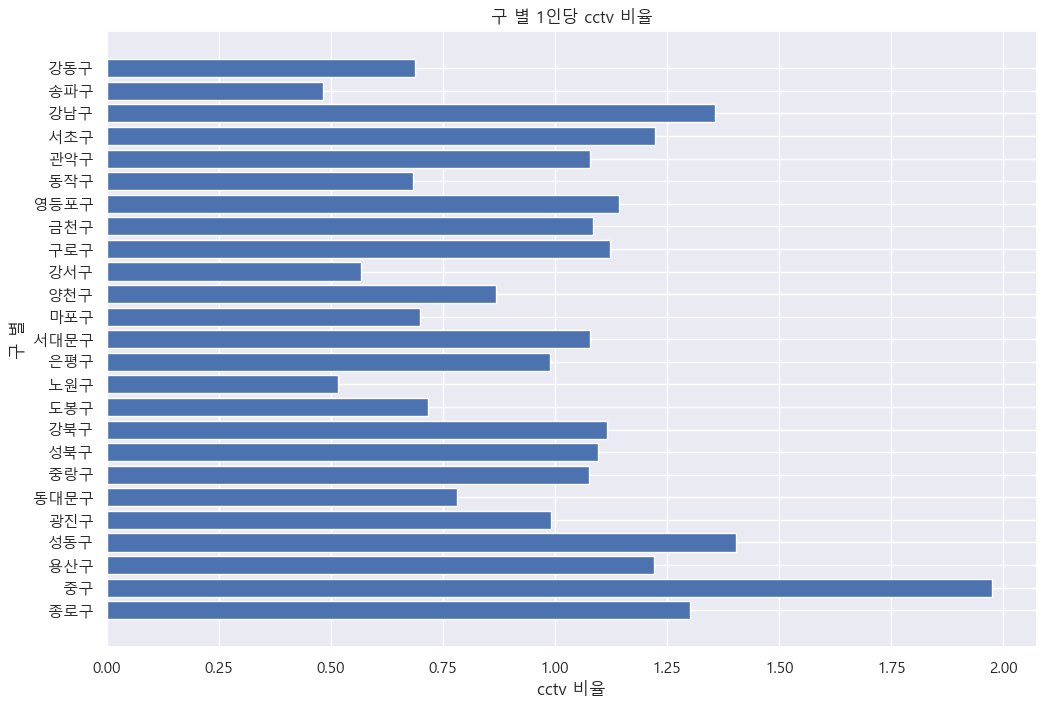

In [29]:
plt.figure(figsize=(12,8))

plt.barh(merge_df.index,merge_df['1인당 cctv 비율'])
plt.xlabel("cctv 비율")
plt.ylabel("구 별")
plt.title("구 별 1인당 cctv 비율")

<Axes: ylabel='구 별'>

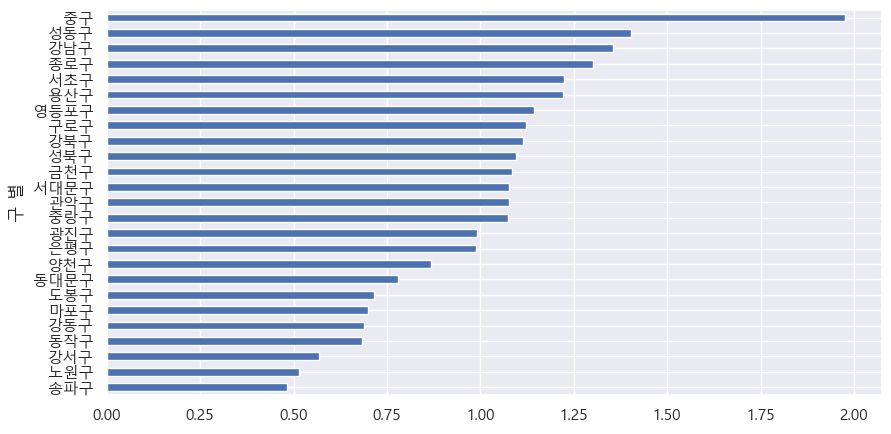

In [30]:
merge_df['1인당 cctv 비율'].sort_values().plot.barh()
# plt.title("구 별 1인당 cctv 비율")
# plt.show()

<Axes: xlabel='1인당 cctv 비율', ylabel='구 별'>

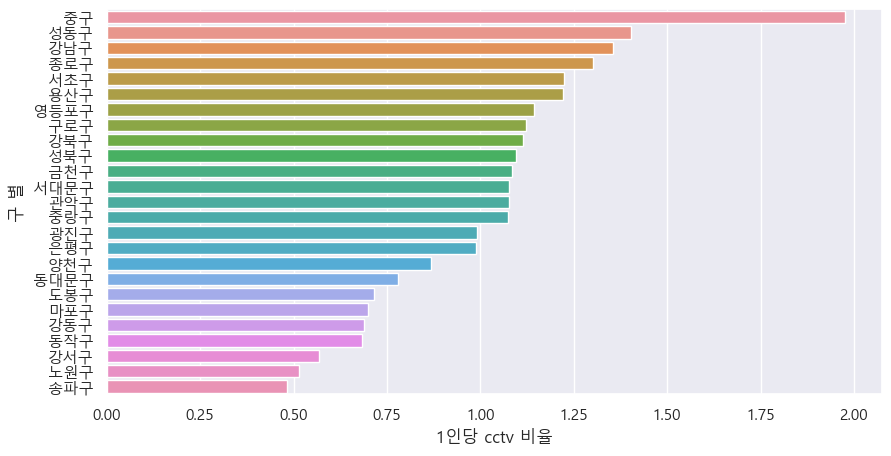

In [31]:
sns.barplot(data=merge_df,x='1인당 cctv 비율', y=merge_df.index,order=merge_df['1인당 cctv 비율'].sort_values(ascending=False).index)

##### 3. 5대 범죄

In [32]:
crime_df = pd.read_excel("./data/5대범죄발생현황_2023.xlsx", usecols='B:D',skiprows=[0,1,2,4])
crime_df.head(3)

,자치구별(2),발생,검거
0,종로구,2712,2755
1,중구,2861,2072
2,용산구,2381,1659


In [33]:
# 컬럼명 변경
# 구 별, 범죄건, 검거건
crime_df.columns = ['구 별', '범죄건', '검거건']

# 인덱스 설정 : 구 별
crime_df.set_index('구 별',inplace=True)

# 검거율 = 검거건 / 범죄건 * 100
crime_df['검거율'] = crime_df['검거건'] / crime_df['범죄건'] * 100

In [34]:
crime_df.head(2)

,범죄건,검거건,검거율
구 별,,,
종로구,2712,2755,101.585546
중구,2861,2072,72.422230


In [36]:
# crime_df, merge_df 병합 : merge(), concat()

merge_crime_df = pd.concat([merge_df,crime_df],axis=1)
merge_crime_df.head()

,총인구,한국인,외국인,cctv 총계,2020년,2021년,2022년,2020년 이전,1인당 cctv 비율,범죄건,검거건,검거율
구 별,,,,,,,,,,,,
종로구,152211,141379,10832,1980,250,85,291,1604,1.300826,2712,2755,101.585546
중구,130785,120437,10348,2584,361,403,137,2044,1.975762,2861,2072,72.422230
용산구,233284,218650,14634,2847,623,422,334,2091,1.220401,2381,1659,69.676606
성동구,288234,281000,7234,4047,485,367,232,3448,1.404068,2112,1510,71.496212
광진구,351252,337416,13836,3480,172,662,271,2547,0.990742,3087,2202,71.331390


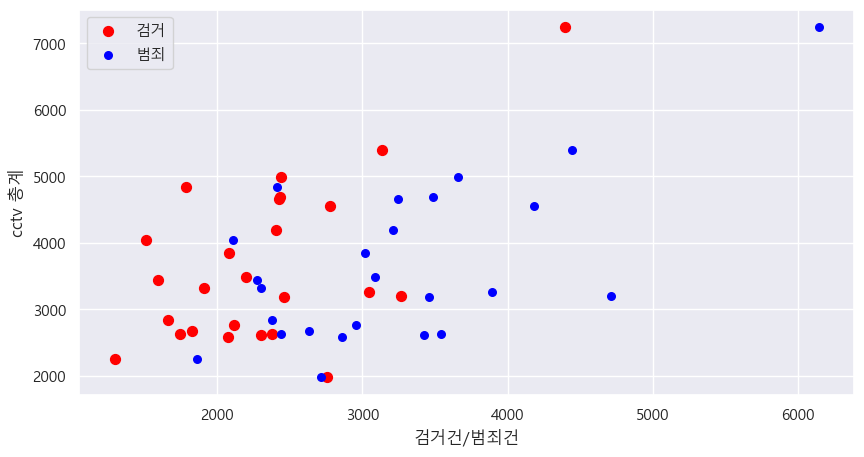

In [38]:
# 검거건, cctv 총계
# 범죄건, cctv 총계

ax = merge_crime_df.plot.scatter(x="검거건",y="cctv 총계", color='red',s=50,label="검거")
merge_crime_df.plot.scatter(x="범죄건",y="cctv 총계", color='blue',s=30,label="범죄", ax=ax)
plt.xlabel("검거건/범죄건")
plt.show()

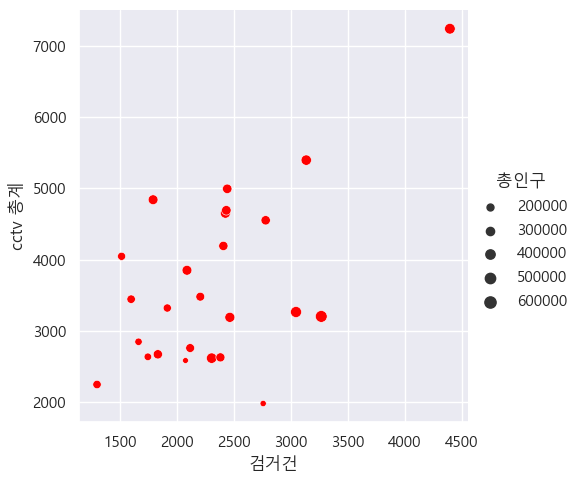

In [39]:
g = sns.relplot(x="검거건", y="cctv 총계", color="red", size="총인구", data=merge_crime_df)